In [20]:
import sqlalchemy
import pandas as pd
import json
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

In [2]:
config = json.load(open('../config/configsql.json', 'r'))

In [3]:
user = config['dev']['mysql']['user']
password = config['dev']['mysql']['password']
host = config['dev']['mysql']['host']
port = config['dev']['mysql']['port']
dbname = config['dev']['mysql']['dbname']

In [4]:
template = "mysql+pymysql://{user}:{password}@{host}:{port}/{dbname}"
connection_string = template.format(user=user, password=password, host=host, port=port, dbname=dbname)

In [5]:
conn = sqlalchemy.create_engine(connection_string, pool_size=1)

In [7]:
df = pd.read_sql("SELECT * from blog order by blog_id desc limit 10", conn)
df.head()

,blog_id,prettyname,title,author,abstract,date_created,publish_date,last_rendered,src_file,c_hash,guid,member_link,last_indexed
0,359,/episodes/2018/the-master-algorithm,The Master Algorithm,Kyle,"In this week's episode, Kyle Polich interviews...",2018-03-16 05:14:46,2018-03-15,2018-03-16 05:14:46,episodes/2018/the-master-algorithm.htm,c8743657c285050362e7c836861823d8,,,NaT
1,358,/careers/2018/what-do-recruiters-do,What do Recruiters do?,Kyle,That's a loaded question almost demanding of a...,2018-03-15 16:30:54,2099-01-01,2018-03-15 16:30:54,careers/2018/what-do-recruiters-do.htm,a9e30c19f12a944e143947c4957685c0,,,NaT
2,357,/careers/2018/just-enough-background-on-databa...,Just Enough Background on Databases and SQL,Kyle,Database are a big topic and an area a profess...,2018-03-15 16:30:25,2099-01-01,2018-03-15 16:30:25,careers/2018/just-enough-sql.htm,d62ef98a2b45d64e28997eadba0955ed,,,NaT
3,356,/careers/2018/chicago/jane-doe,Jane Doe,Kyle,This is another pro,2018-03-13 04:19:38,2018-03-01,2018-03-13 04:20:43,careers/2018/chicago/profile2.htm,163c52e77f550e62c438085d6c333881,,,NaT
4,355,/careers/2018/chicago/john-doe,John Doe,Kyle,This is one pro,2018-03-13 04:19:32,2018-03-01,2018-03-13 04:19:32,careers/2018/chicago/profile1.htm,b32283772c727dccac04a0bd7d3a1230,,,NaT


# AI & DS TSHIRT

In [11]:
df = pd.read_sql("select a.item_id , a.order_item_size_id , sum(quantity) as quantity , b.title from order_details a inner join store_items_sizes b on a.order_item_size_id = b.order_item_size_id where a.item_id = 11 or a.item_id = 23 GROUP BY order_item_size_id, item_id",conn)

In [18]:
df['quantity'] = df['quantity'].astype(int)
df

,item_id,order_item_size_id,quantity,title
0,11,3,2,M
1,11,4,2,L
2,11,5,1,XL
3,23,26,3,S
4,23,27,6,M
5,23,28,6,L
6,23,29,1,XL


In [32]:
ds = df.loc[df['item_id'] == 11]
ai = df.loc[df['item_id'] == 23]

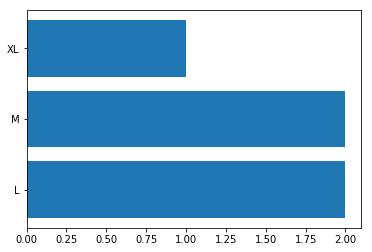

In [33]:
plt.barh(ds['title'], ds['quantity'], align='center')
plt.show()

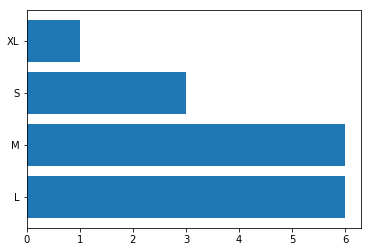

In [34]:
plt.barh(ai['title'], ai['quantity'], align='center')
plt.show()

# Total Tshirt

In [36]:
df = pd.read_sql("select sum(quantity),title from order_details a inner join store_items_sizes b on a.order_item_size_id = b.order_item_size_id GROUP BY title",conn)

In [38]:
df

,sum(quantity),title
0,8.0,L
1,8.0,M
2,3.0,S
3,2.0,XL


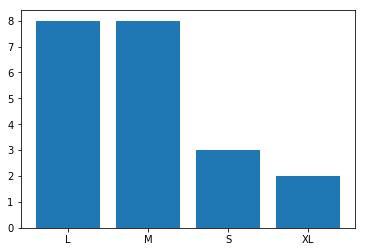

In [44]:
plt.bar(df['title'], df['sum(quantity)'], align='center')
plt.show()